### Визуализация предобработанных аннотаций (разметки), представленных в формате pd.DataFrame

In [6]:
import pandas as pd
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

In [7]:
data = pd.read_pickle('../data/dataset.pkl')
print(data.shape)
data.sample(3, random_state=42)

(2962, 4)


,file_name,bbox,segmentation,category_id
1750,GX010294_MP4-0031_jpg.rf.v2bjFn7YdZWcgNFvQabS.jpg,"[525, 1109, 2960, 1051]","[1717, 1109, 1776, 1111, 3485, 2160, 525, 2160]",1
1583,GX010297_MP4-0821_jpg.rf.omnTe4SbZzg8iqemzOL9.jpg,"[0, 0, 1666, 1250]","[1651, 271, 1429, 0, 0, 0, 0, 1250, 1666, 360]",2
2741,GX010294_MP4-0071_jpg.rf.hwjr8hOKeo4JIhrI64hi.jpg,"[0, 161, 1733, 1310]","[1707, 880, 1035, 161, 0, 319, 0, 1471, 1733, ...",2


___

In [8]:
def show_n_examples(n):
    indices = random.sample(data.index.to_list(), n)
    indices = [0, 1, 2]
    
    fig, axes = plt.subplots(1, len(indices), figsize=(5 * len(indices), 5))
    if n == 1:
        axes = [axes]
    
    for i, idx in enumerate(indices):
        img = cv2.imread(f'../train/{data["file_name"][idx]}')
        category = data["category_id"][idx]
        segmentation = data['segmentation'][idx]
        points = np.array(segmentation, dtype=np.int32).reshape((-1, 1, 2))
        cv2.polylines(img, [points], isClosed=True, color=(0, 0, 255), thickness=30)
        
        axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        axes[i].set_title(f'category id: {category}')
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

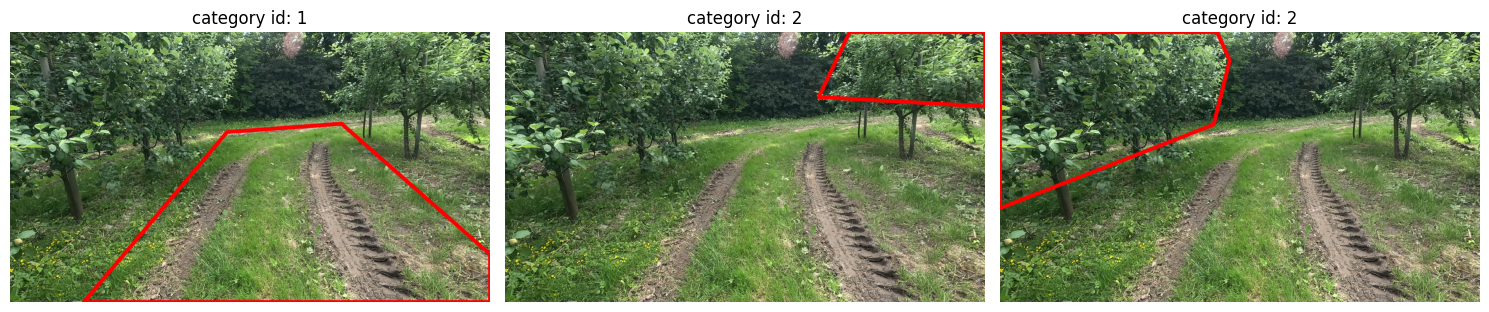

In [9]:
show_n_examples(4)